In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

In [2]:
df = pd.read_csv('July_df.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292678 entries, 0 to 292677
Data columns (total 10 columns):
 #   Column                                         Non-Null Count   Dtype
---  ------                                         --------------   -----
 0   Violation Location                             292678 non-null  int64
 1   Violation Code                                 292678 non-null  int64
 2   Vehicle Body Type                              292678 non-null  int64
 3   Vehicle Make                                   292678 non-null  int64
 4   Violation Time                                 292678 non-null  int64
 5   Violation County                               292678 non-null  int64
 6   Street Name                                    292678 non-null  int64
 7   Vehicle Color                                  292678 non-null  int64
 8   Median income (dollars); Estimate; Households  292678 non-null  int64
 9   IssueDate                                      292678 non-n

In [4]:
df3 = df.copy()
df3['Violation Time'] = df3['Violation Time'].div(100).astype(int)

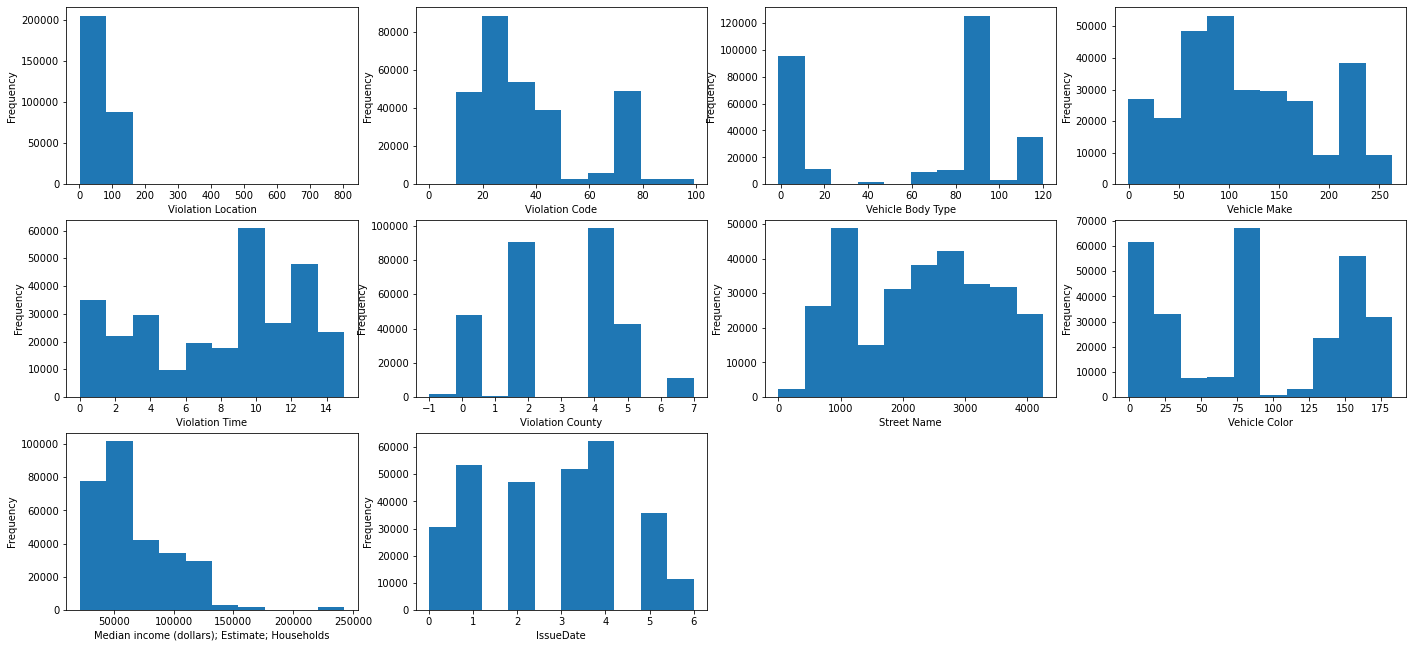

In [11]:
fig = plt.figure(figsize=(24,15))
i=0
for column in df3:
    sub = fig.add_subplot(4,4 , i +1)
    sub.set_xlabel(column)
    df3[column].plot(kind = 'hist')
    i = i+1

In [57]:
df3

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate
0,1,46,87,52,1,4,3529,80,85032,0
1,1,63,81,16,13,4,3529,-1,85032,4
2,1,63,28,147,13,4,3529,165,85032,4
3,1,63,87,95,13,4,3529,165,85032,4
4,1,63,28,167,13,4,3529,74,85032,4
...,...,...,...,...,...,...,...,...,...,...
292673,75,14,87,24,1,2,1755,158,26002,4
292674,75,14,87,95,1,2,1755,10,26002,4
292675,75,53,87,38,9,4,1941,78,26002,1
292676,75,53,81,215,11,2,1941,30,26002,3


In [56]:
df3['Violation Code'].unique()

array([46, 63, 19, 14, 16, 40, 38, 51, 71, 74, 17, 21, 76, 70, 20, 37, 31,
       69, 84, 82, 42, 60, 75, 10, 73,  4, 53, 78, 87, 41, 48, 80, 72, 18,
       13, 26, 98,  9, 33, 67, 50, 68, 61, 11, 83, 47, 35, 79, 99, 24, 45,
       66,  6, 62, 85, 27, 22, 77, 91, 25, 49, 39, 89, 96, 95, 54, 34, 90,
       23, 52, 93,  8, 94, 29, 64, 44, 97, 65,  0, 59])

In [23]:
day = df3.groupby(by=df3['Violation Location'],as_index=False).count()
day

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate
0,1,16915,16915,16915,16915,16915,16915,16915,16915,16915
1,4,2,2,2,2,2,2,2,2,2
2,5,15444,15444,15444,15444,15444,15444,15444,15444,15444
3,6,12556,12556,12556,12556,12556,12556,12556,12556,12556
4,7,9103,9103,9103,9103,9103,9103,9103,9103,9103
...,...,...,...,...,...,...,...,...,...,...
92,123,978,978,978,978,978,978,978,978,978
93,136,2,2,2,2,2,2,2,2,2
94,168,1,1,1,1,1,1,1,1,1
95,203,1,1,1,1,1,1,1,1,1


In [25]:
day_code = day[['Violation Location', 'Violation Code']]
day_code

,Violation Location,Violation Code
0,1,16915
1,4,2
2,5,15444
3,6,12556
4,7,9103
...,...,...
92,123,978
93,136,2
94,168,1
95,203,1


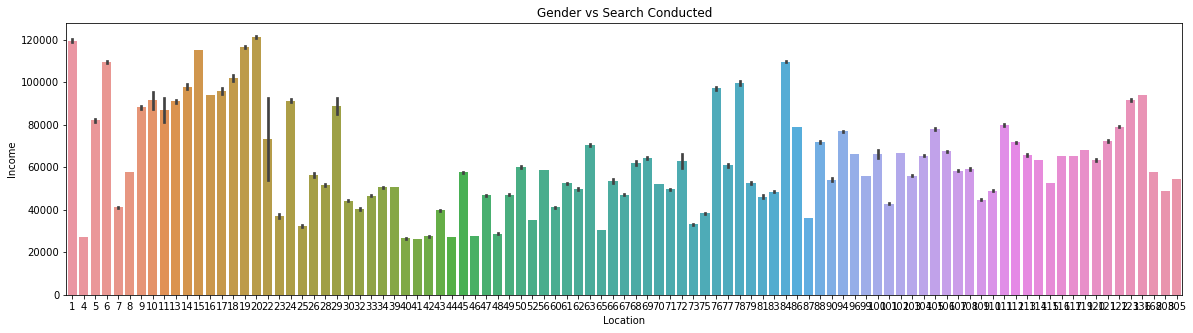

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x='Violation Location', y='Median income (dollars); Estimate; Households', data=df3)
plt.title('Gender vs Search Conducted')
plt.xlabel('Location')
plt.ylabel('Income')
plt.show()

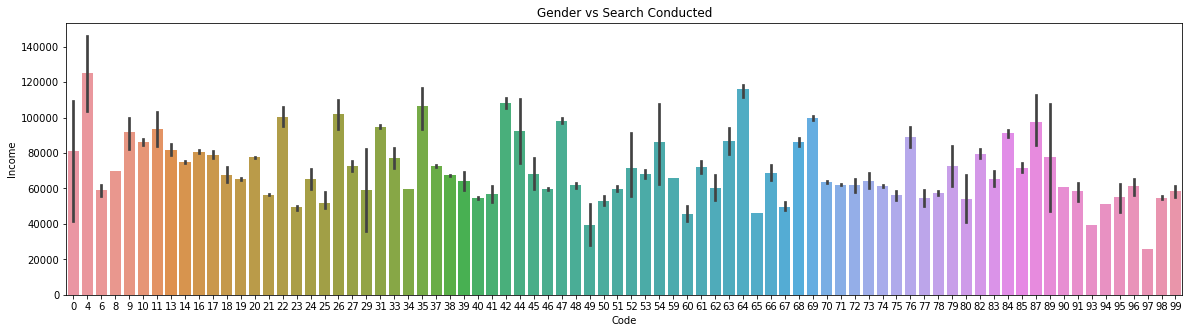

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(x='Violation Code', y='Median income (dollars); Estimate; Households', data=df3)
plt.title('Gender vs Search Conducted')
plt.xlabel('Code')
plt.ylabel('Income')
plt.show()

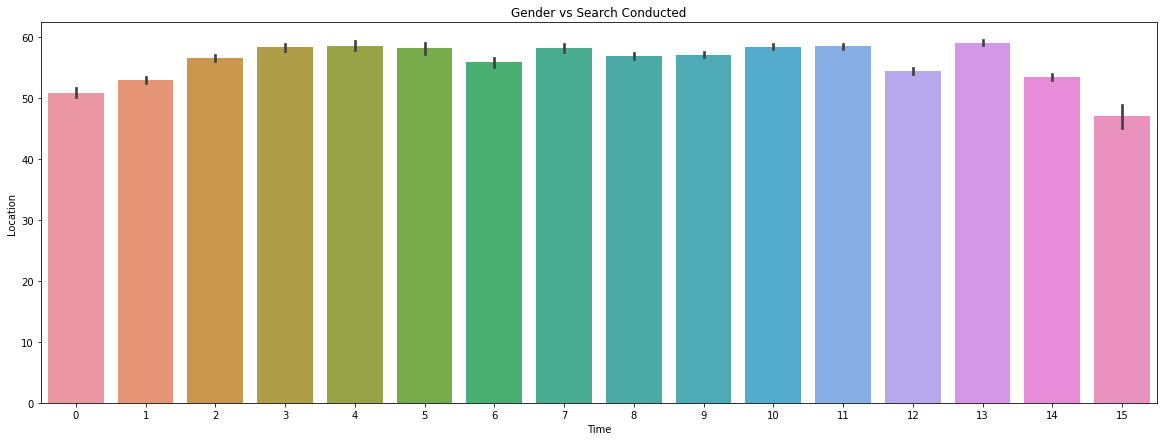

In [34]:
plt.figure(figsize=(20,7))
sns.barplot(x='Violation Time', y='Violation Location', data=df3)
plt.title('Gender vs Search Conducted')
plt.xlabel('Time')
plt.ylabel('Location')
plt.show()

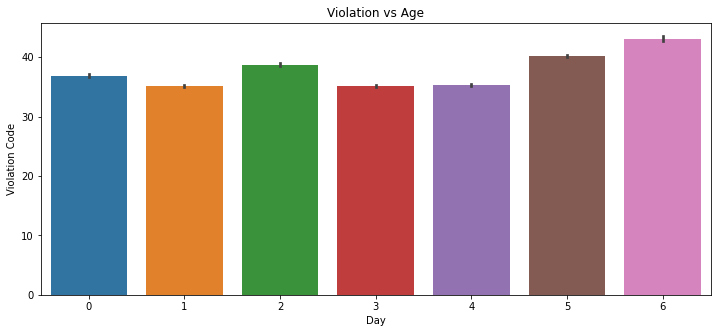

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x='IssueDate',y='Violation Code',data=df3)
plt.title('Violation vs Age')
plt.ylabel('Violation Code')
plt.xlabel('Day')
plt.show()

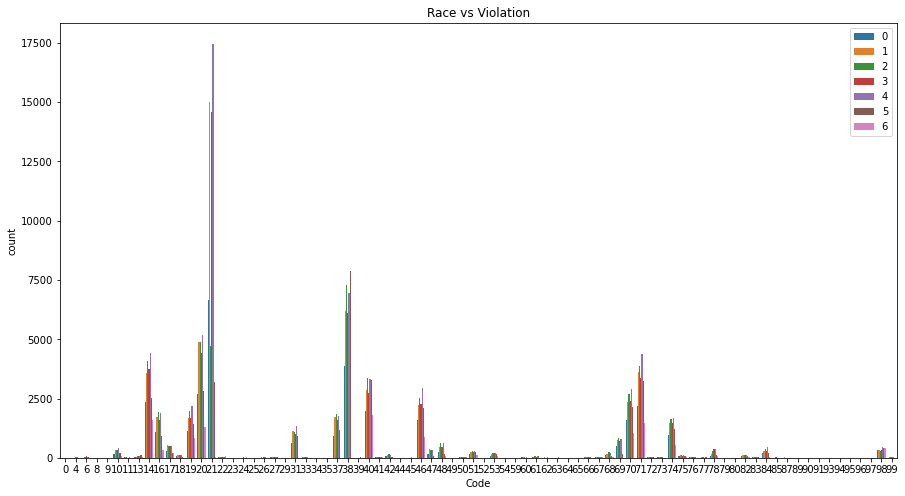

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x='Violation Code',hue='IssueDate',data=df3)
plt.title('Race vs Violation')
plt.xlabel('Code')
plt.legend(loc='upper right')
plt.show()

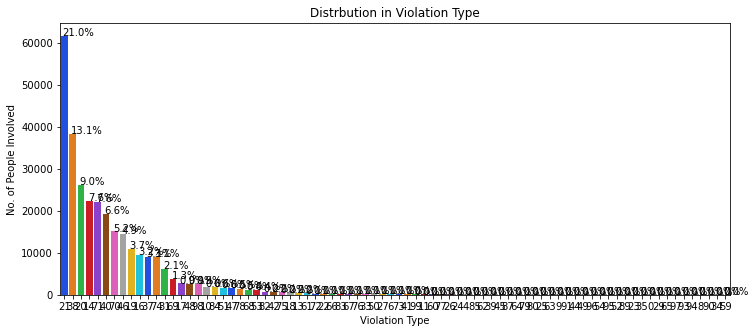

In [40]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = 'Violation Code', data = df3, order = df3['Violation Code'].value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(df3['Violation Code']))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

In [47]:
df3['Violation Code'].value_counts().head(60)

21    61608
38    38277
20    26200
14    22299
71    22112
40    19320
70    15113
46    14458
19    10883
16     9472
37     9056
74     8949
31     6134
69     3751
17     2703
48     2655
98     2552
10     1832
84     1815
51     1628
47     1608
78     1439
68     1117
53     1071
82      675
42      658
75      559
18      558
13      471
61      326
72      267
22      257
66      251
83      210
67      209
76      200
33      169
50      164
27      153
6       150
73      149
41      132
99      107
11       89
60       84
77       82
26       78
24       70
4        68
85       62
62       58
39       55
45       50
87       41
64       30
79       27
80       22
25       22
63       21
9        13
Name: Violation Code, dtype: int64

In [55]:
df3['Violation Location'].value_counts().head(60)

1      16915
5      15444
6      12556
84      9343
7       9103
43      8583
79      8084
75      7419
70      7306
90      7038
109     6714
19      6669
52      6622
83      6247
94      5649
46      5501
49      5450
114     5396
88      5253
71      4965
34      4690
77      4567
9       4338
61      4322
120     4310
112     4255
104     4235
48      4232
67      4219
20      4133
24      3586
44      3541
45      3437
13      3428
47      3337
110     3310
115     3304
108     3260
102     3218
81      3216
122     2936
121     2905
33      2792
50      2745
73      2473
103     2388
17      2329
18      2235
78      2213
14      2056
60      1945
41      1900
106     1870
42      1849
30      1783
107     1691
40      1514
26      1435
76      1417
28      1392
Name: Violation Location, dtype: int64

In [49]:
df5 = df3[~(df3['Violation Code'] <= 25)]

In [50]:
df5

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate
0,1,46,87,52,1,4,3529,80,85032,0
1,1,63,81,16,13,4,3529,-1,85032,4
2,1,63,28,147,13,4,3529,165,85032,4
3,1,63,87,95,13,4,3529,165,85032,4
4,1,63,28,167,13,4,3529,74,85032,4
...,...,...,...,...,...,...,...,...,...,...
292664,75,40,1,107,6,2,2344,74,26002,1
292666,75,71,87,16,7,2,1947,16,26002,4
292675,75,53,87,38,9,4,1941,78,26002,1
292676,75,53,81,215,11,2,1941,30,26002,3


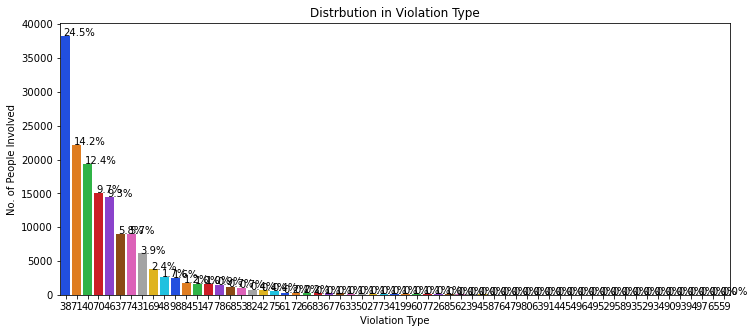

In [52]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = 'Violation Code', data = df5, order = df5['Violation Code'].value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(df5['Violation Code']))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

In [58]:
arr = [1, 2, 3, 4, 5, 6]

In [59]:
ar = arr.map({1:0, 2:1, 3:0, 4:1, 5:0, 6:1})

AttributeError: 'list' object has no attribute 'map'

In [60]:
df3['Violation County'].unique()

array([ 4,  2,  3, -1,  7,  0,  5,  1,  6])

In [61]:
ara = df3['Violation County'].map({
    -1:1,
    0:0,
    1:1,
    2:0,
    3:1,
    4:0,
    5:1,
    6:0,
    7:1
})

In [63]:
ara.unique()

array([0, 1])

In [68]:
bra = df3['Violation County'].map({
    (-1,1,3,5,7):1,
    (0,2,4,6):0
})

In [70]:
bra.unique()

array([nan])

In [72]:
df6 = df3.copy()

null = [-1,1,3,5,7]
d1 = dict.fromkeys(null, 0)

one = [0,2,4,6]
d2 = dict.fromkeys(one, 1)

d = {**d1, **d2}
print(d)


{-1: 0, 1: 0, 3: 0, 5: 0, 7: 0, 0: 1, 2: 1, 4: 1, 6: 1}


In [73]:
df6['Viocounty'] = df6['Violation County'].map(d)
print(df6)

        Violation Location  Violation Code  Vehicle Body Type  Vehicle Make  \
0                        1              46                 87            52   
1                        1              63                 81            16   
2                        1              63                 28           147   
3                        1              63                 87            95   
4                        1              63                 28           167   
...                    ...             ...                ...           ...   
292673                  75              14                 87            24   
292674                  75              14                 87            95   
292675                  75              53                 87            38   
292676                  75              53                 81           215   
292677                  75              53                 81           147   

        Violation Time  Violation County  Street Na

In [82]:
df6['Viocounty'].tail(30)

292648    1
292649    1
292650    1
292651    1
292652    1
292653    1
292654    1
292655    1
292656    1
292657    1
292658    1
292659    1
292660    1
292661    1
292662    1
292663    1
292664    1
292665    1
292666    1
292667    1
292668    1
292669    1
292670    1
292671    1
292672    1
292673    1
292674    1
292675    1
292676    1
292677    1
Name: Viocounty, dtype: int64

In [85]:

df6['Violation County'].tail(60)

292618    2
292619    2
292620    2
292621    2
292622    2
292623    2
292624    2
292625    2
292626    2
292627    2
292628    2
292629    2
292630    2
292631    2
292632    2
292633    2
292634    2
292635    2
292636    2
292637    2
292638    2
292639    2
292640    2
292641    2
292642    2
292643    2
292644    2
292645    2
292646    2
292647    2
292648    2
292649    2
292650    2
292651    2
292652    2
292653    2
292654    2
292655    2
292656    2
292657    2
292658    2
292659    2
292660    2
292661    2
292662    2
292663    2
292664    2
292665    2
292666    2
292667    2
292668    2
292669    2
292670    2
292671    2
292672    2
292673    2
292674    2
292675    4
292676    2
292677    2
Name: Violation County, dtype: int64